# Spin wave propagation in periodic system

In [1]:
from fidimag.micro import Sim
from fidimag.common import CuboidMesh
from fidimag.micro import UniformExchange, Demag

The mesh in this example is a three-dimensional stripe with edge lengths $a$ and $b$ and thickness $d$. The discretisation in this regular mesh is 1 nm along all edges. System is periodic in the x direction.

In [2]:
a = 90  # nm
b = 30  # nm

dx = dy = dz = 1  # nm

mesh = CuboidMesh(nx=int(a/dx), ny=int(b/dy), nz=1, dx=dx, dy=dy, dz=dz, unit_length=1e-9, periodicity=(True, False, False))

The used material is Permalloy with the following parameters (saturation magnetsiation $M_\text{s}$, exchange constant $A$, and Gilbert damping $\alpha$):

- magnetisation saturation $M_\text{s} = 10^6 \text{A/m}$
- exchange energy constant $A = 13 \times 10^{-12} \text{J/m}$
- Gilbert damping $\alpha = 0.02$

In [3]:
Ms = 1e6  # magnetisation saturation (A/m)
A = 13e-12  # exchange stiffness (J/m)
alpha = 0.2  # Gilbert damping
gamma = 2.211e5  # gyromagnetic ratio (m/As)

Now, the simulation object is created and exchange and demagnetisation energies are added to the simulation. In addition, one-dimensional periodic boundary conditions are posed.

In [4]:
sim  = Sim(mesh)  # create simulation object

# Set parameters.
sim.Ms = Ms
sim.alpha = alpha
sim.gamma = gamma

# Add energies.
sim.add(UniformExchange(A=A))
sim.add(Demag())

The initial magnetisation is not defined at this point. Since the spin waves should occur, system has to be initialised in an appropriate way. In this case, the magnetisation is uniform at all mesh nodes, except in a circular region at the left edge of the boundary. The function which will be used for magnetisation initialisation is:

In [5]:
def m_initial(coord):
    # Extract x and y coordinates.
    x = coord[0]
    y = coord[1]
    
    # The centre of the circle
    x_centre = a/10.
    y_centre = b/2.
    
    # Compute the circle radius.
    r = ((x-x_centre)**2 + (y-y_centre)**2)**0.5
    
    if r < 2:
        return (1, 0, 0.1)
    else:
        return (1, 0, 0)
    
sim.set_m(m_initial)

The function used for plotting magnetisation $z$ component in all subsequent plots.

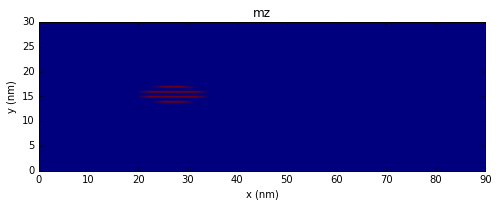

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_magnetisation(m, layer=0):
    n_layer = int(a/dx) * int(b/dy)
    m.shape = (-1, 3)
    
    mx = m[:, 0][layer*n_layer:(layer+1)*n_layer]
    my = m[:, 1][layer*n_layer:(layer+1)*n_layer]
    mz = m[:, 2][layer*n_layer:(layer+1)*n_layer]
    mx.shape = (int(a/dx), int(b/dy))
    my.shape = (int(a/dx), int(b/dy))
    mz.shape = (int(a/dx), int(b/dy))
    
    extent = [0, a, 0, b]
    plt.figure(figsize=(8, 4))
    plt.imshow(mz, extent=extent)
    plt.xlabel('x (nm)')
    plt.ylabel('y (nm)')
    plt.title('mz')
    
plot_magnetisation(np.copy(sim.spin), layer=0)

When the initial magnetisation is set, the simulation is executed for 2 ps, and the magnetisation is plotted every $\Delta t = 0.25 \text{ps}$

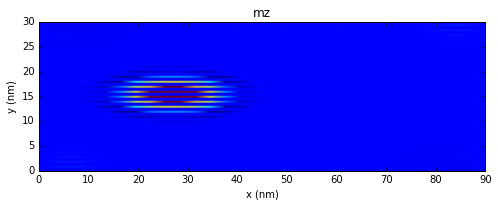

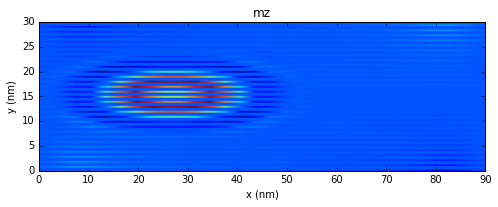

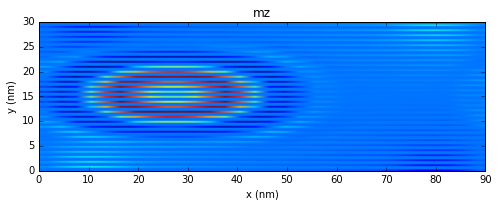

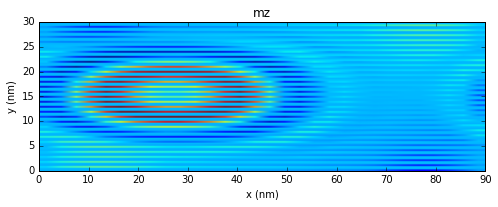

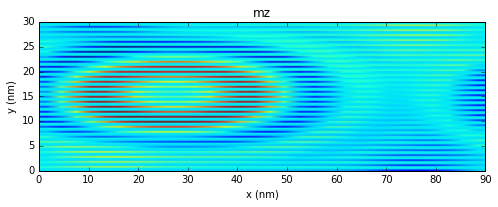

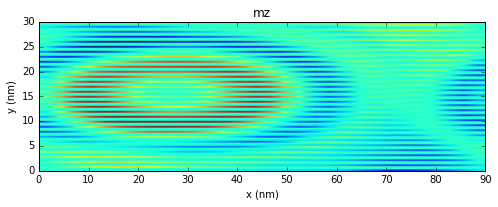

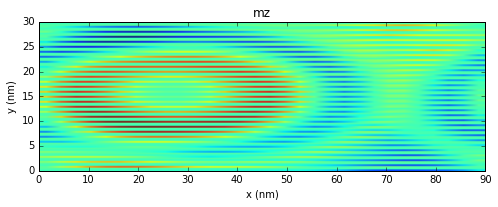

In [7]:
import numpy as np

t_sim = 2e-12  # simulation time (s)
dt = 0.25e-12  # plotting time step (s)
t_array = np.arange(dt, t_sim, dt)

for t in t_array:
    sim.run_until(t)
    plot_magnetisation(np.copy(sim.spin))

It can be seen that the spin wave "travels across" the left boundary in $x$ direction.